# Data Collection, Data Visualization, Data Exploration and Data Processing

In [1]:
# importing Libraries
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from scipy.stats import skew,kurtosis
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


### Data Collection

In [2]:
# load data
data=pd.read_csv('online_shoppers_intention.csv')
X=data.copy()

### Data Exploration

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
# columns
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
# data description
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [6]:
# shape
data.shape

(12330, 18)

In [7]:
# missing values in column wise
cols = data.columns[data.isnull().sum()!=0]
if data[cols].isnull().sum().empty:
    print('There are no missing values in data')
else:
    print('Missing data')

There are no missing values in data


In [8]:
# numerical, non-numerical and boolean columns
obj_cols = [cols for cols in data.columns if data[cols].dtype == 'object']
bool_cols = [cols for cols in data.columns if data[cols].dtype == 'bool']
num_cols = [cols for cols in data.columns if data[cols].dtype not in ['object','bool']]

print(f'Non-numerical columns:\n{obj_cols}')
print(f'\nBoolean columns:\n{bool_cols}')
print(f'\nNumerical columns:\n{num_cols}')

Non-numerical columns:
['Month', 'VisitorType']

Boolean columns:
['Weekend', 'Revenue']

Numerical columns:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


In [9]:
# Numerical data summary
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [10]:
print('Before Modification')
print(data['Month'].unique())
print()

print('After Modification')
data['Month'] = data['Month'].replace('June', 'Jun', regex=True)
print(data['Month'].unique())

Before Modification
['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']

After Modification
['Feb' 'Mar' 'May' 'Oct' 'Jun' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']


### Data Visualization

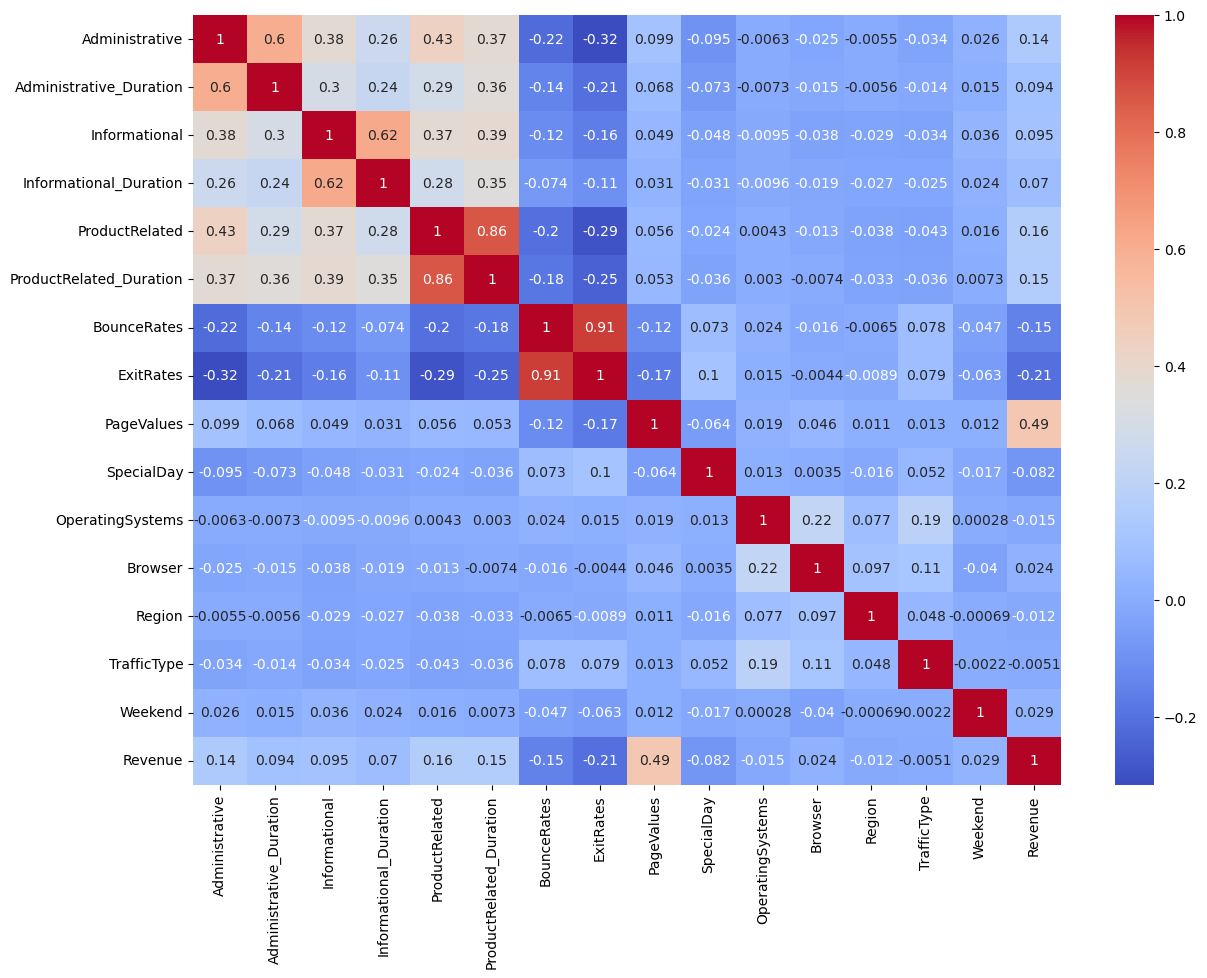

In [11]:
# heatmap (correlations among data)
corr=data.corr()
fig=plt.figure(figsize=(14,10))
sns.heatmap(corr, annot=True, cmap='coolwarm');

Text(0, 0.5, 'Percentage')

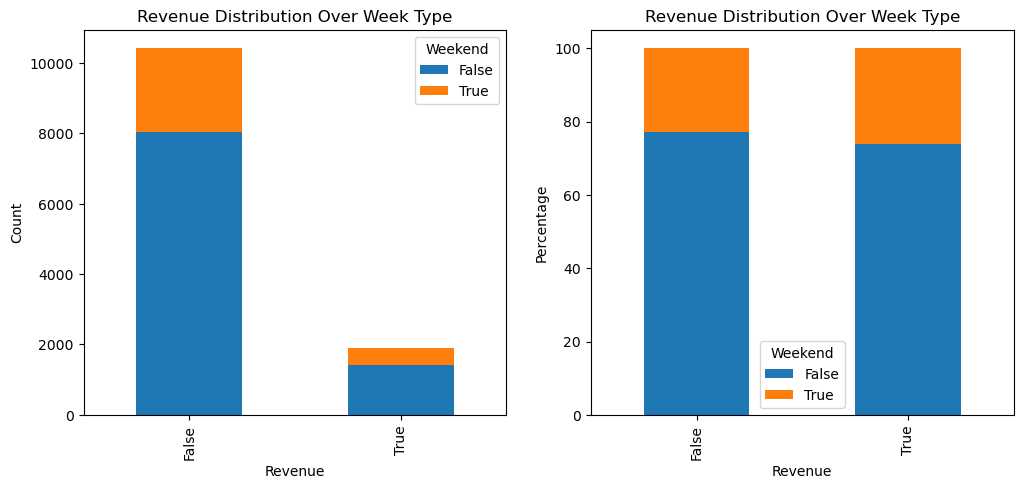

In [12]:
browser_users = data.groupby(['Revenue', 'Weekend']).size().unstack()
temp = browser_users.transpose() / browser_users.sum(axis=1) * 100
temp = temp.T

fig, axis = plt.subplots(1, 2, figsize=(12, 5))

browser_users.plot(kind='bar', stacked=True, ax=axis[0])
axis[0].set_title('Revenue Distribution Over Week Type')
axis[0].set_ylabel('Count')

temp.plot(kind='bar', stacked=True, ax=axis[1])
axis[1].set_title('Revenue Distribution Over Week Type')
axis[1].set_ylabel('Percentage')

Text(0, 0.5, 'Percentage')

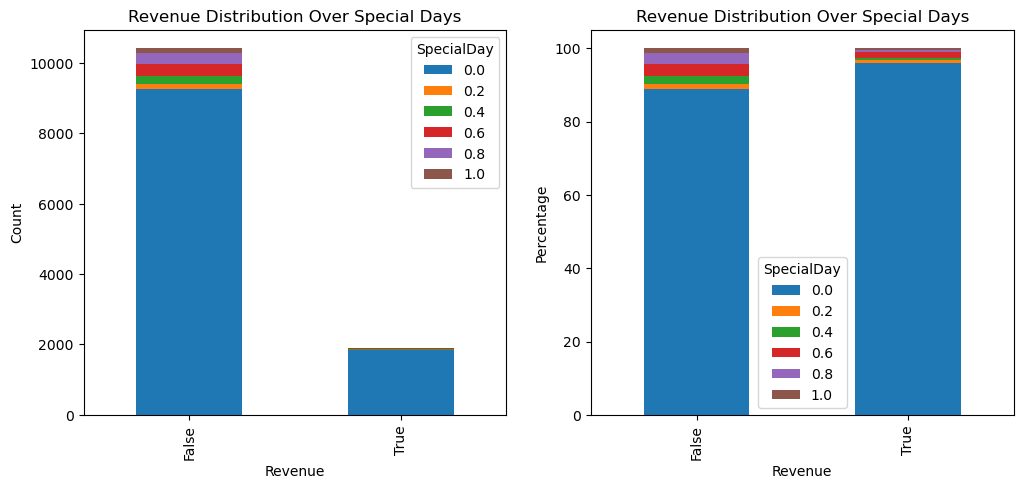

In [13]:
specialDay_users = data.groupby(['Revenue', 'SpecialDay']).size().unstack()
temp = specialDay_users.transpose() / specialDay_users.sum(axis=1) * 100
temp = temp.T

fig, axis = plt.subplots(1, 2, figsize=(12, 5))

specialDay_users.plot(kind='bar', stacked=True, ax=axis[0])
axis[0].set_title('Revenue Distribution Over Special Days')
axis[0].set_ylabel('Count')

temp.plot(kind='bar', stacked=True, ax=axis[1])
axis[1].set_title('Revenue Distribution Over Special Days')
axis[1].set_ylabel('Percentage')

In [14]:
data['month_nu'] = pd.to_datetime(data['Month'], format='%b').dt.month

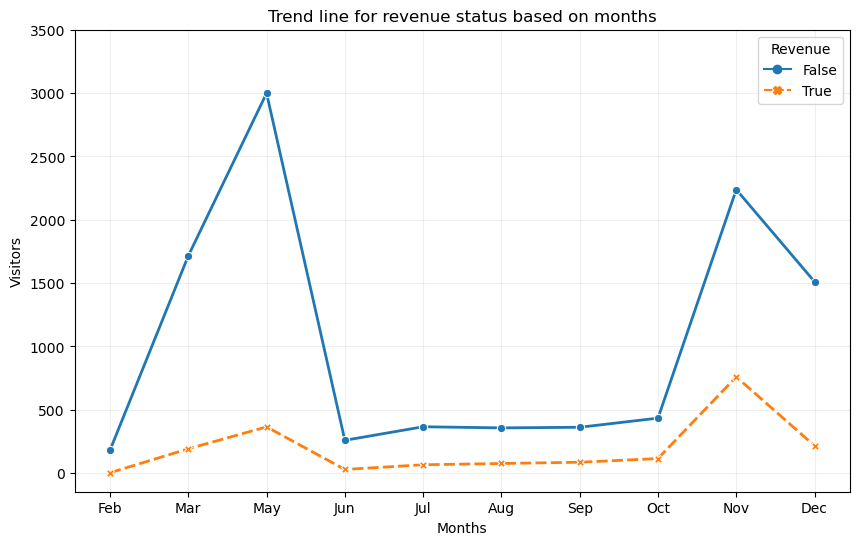

In [15]:
trend = pd.DataFrame(data.groupby(['Month', 'month_nu', 'Revenue']).size()).reset_index()
trend.sort_values('month_nu', inplace=True)
trend = trend.drop('month_nu', axis=1)
trend.columns = ["Months", "Revenue", "Frequency"]

plt.figure(figsize=(10, 6))
sns.lineplot(data=trend, x='Months', y='Frequency', hue='Revenue', style='Revenue', markers=True, markersize=6, linewidth=2)

plt.title("Trend line for revenue status based on months")
plt.xlabel("Months")
plt.ylabel("Visitors")
plt.yticks(range(0, 3501, 500))
plt.grid(alpha=0.2)

Text(0.5, 1.0, 'Top 5 Browsers Of Non Revenue Generating Users')

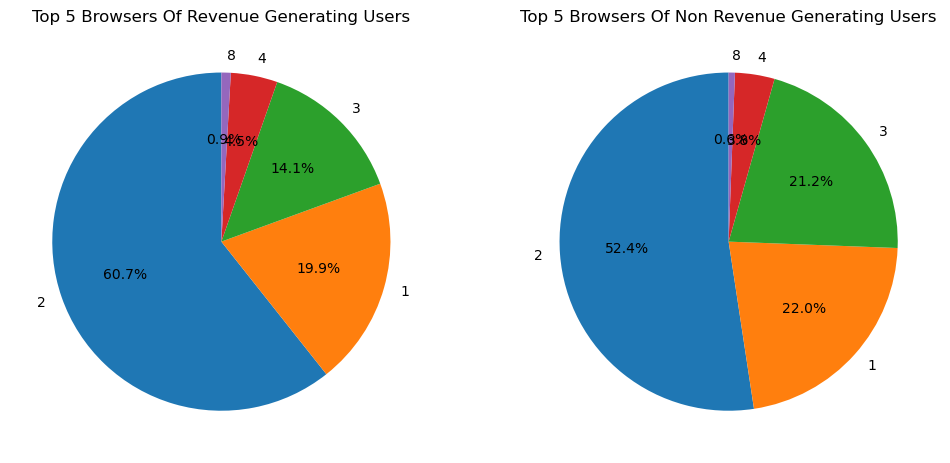

In [16]:
os_type_rev = data[data['Revenue'] == True]['OperatingSystems'].value_counts()
os_type_rev = os_type_rev[:5]

os_type_no_rev = data[data['Revenue'] == False]['OperatingSystems'].value_counts()
os_type_no_rev = os_type_no_rev[:5]


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].pie(os_type_rev, labels=os_type_rev.index, autopct = '%.1f%%', startangle=90)
axes[0].set_title('Top 5 Browsers Of Revenue Generating Users')

axes[1].pie(os_type_no_rev, labels=os_type_rev.index, autopct = '%.1f%%', startangle=90)
axes[1].set_title('Top 5 Browsers Of Non Revenue Generating Users')

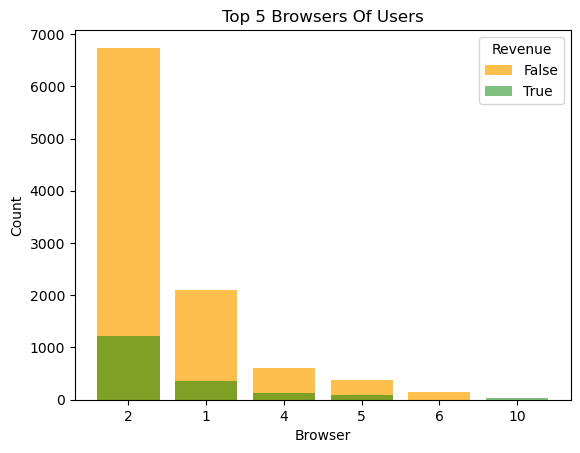

In [17]:
browser_rev = data[data['Revenue'] == True]['Browser'].value_counts()
browser_rev = browser_rev[:5]

browser_no_rev = data[data['Revenue'] == False]['Browser'].value_counts()
browser_no_rev = browser_no_rev[:5]

plt.bar(browser_no_rev.index.astype(str), browser_no_rev, label='False', color='orange', alpha=0.7)
plt.bar(browser_rev.index.astype(str), browser_rev, label='True', color='green', alpha=0.5)
plt.title('Top 5 Browsers Of Users')
plt.xlabel('Browser')
plt.ylabel('Count')
plt.legend(title='Revenue')

In [18]:
# log transform skewed variables
skew = data.skew()
skew = skew[abs(skew) > 0.75].index.tolist()

for i in skew:
    if data[i].min() < 0:
        data[i] = data[i] - data[i].min()
    data[i] = data[i].apply(np.log1p)

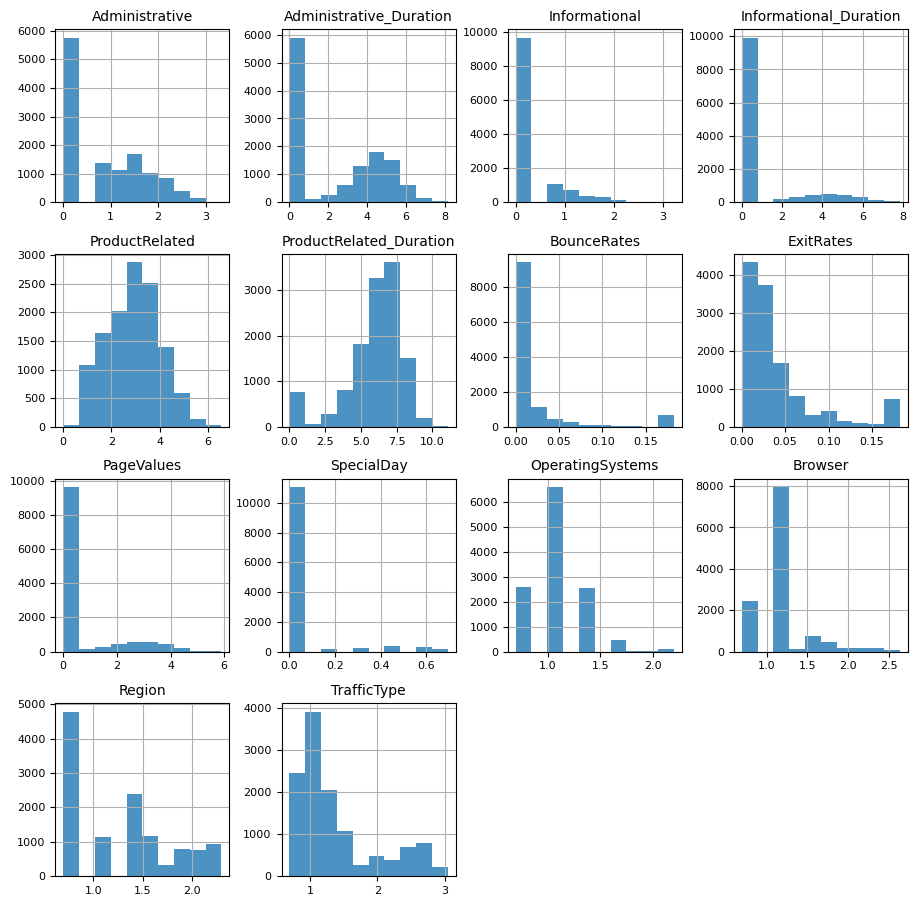

In [19]:
# histplot of numerical variables 
params = {'axes.titlesize':'10',
         'xtick.labelsize':'8',
         'ytick.labelsize':'8'}
matplotlib.rcParams.update(params)
data[num_cols].hist(figsize=(11,11), alpha=0.8);

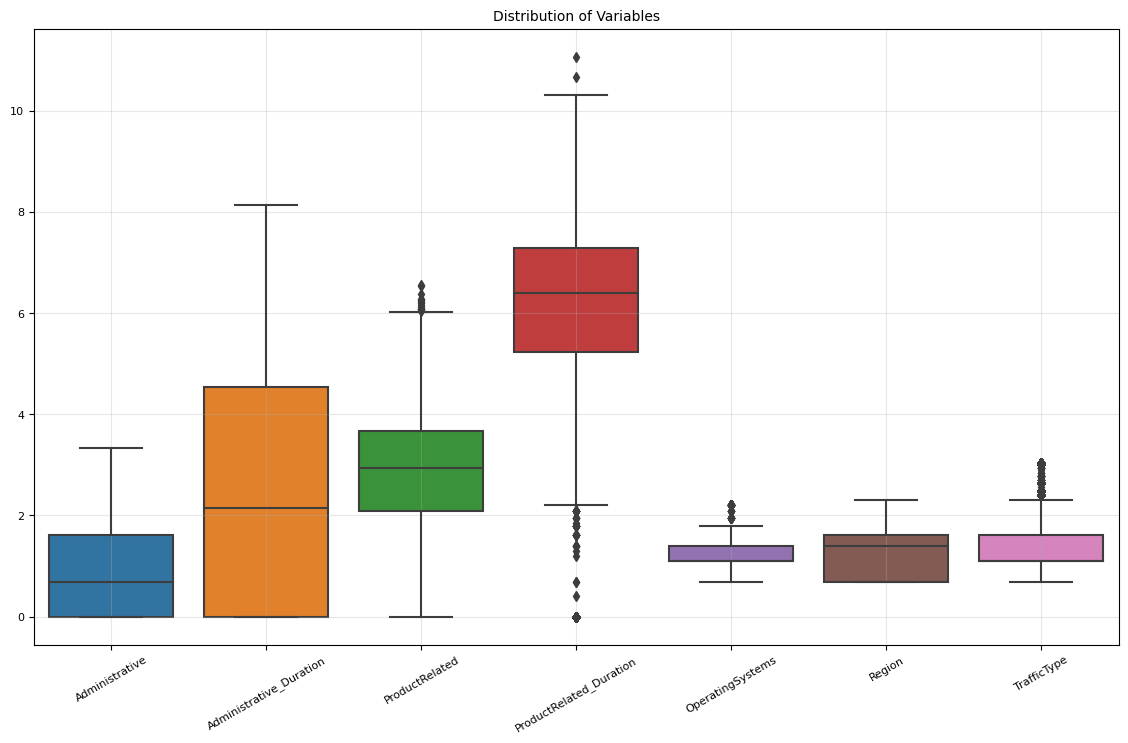

In [20]:
# boxplot of numerical variables
cols = data[['Administrative', 'Administrative_Duration','ProductRelated','ProductRelated_Duration',
            'OperatingSystems','Region', 'TrafficType']]
plt.figure(figsize=(14,8))
fig = sns.boxplot(data=cols)
fig.set_xticklabels(fig.get_xticklabels(),rotation=30)

plt.title('Distribution of Variables')
plt.grid(alpha=0.3)
plt.show()

### Data Processing

In [21]:
# Feature extraction
# Principal Component Analysis
flag=False

if flag:
    X = X[num_cols]

    # data standardization
    norm_x = (X - X.mean(axis=0))/X.std(axis=0)

    n = norm_x.shape[0]
    x_mean = np.mean(norm_x,axis=0)
    x_cov = np.cov(norm_x.astype(float).T, rowvar=False)

    eigen_val,eigen_vec = np.linalg.eig(x_cov)        # eigen value, eigen vector

    sort_x = np.argsort(eigen_val)[::-1]
    eigen_vectors = eigen_vec[:,sort_x]

    k=2
    pca_score = np.matmul(norm_x,eigen_vectors[:,:k])

    Proportion_var = []
    for i in eigen_val:
        Proportion_var.append((i/sum(eigen_val))*100)
    print(Proportion_var[:8])

    print(f'\nThe first {k} principal component scores:\n{pca_score}')

 Explained variance :
 [3.40863827 1.68573445 1.40023415 1.07815038 1.01007678 0.96804458
 0.9500514  0.91446478 0.85872358 0.75362047 0.4214237  0.35163483
 0.12284964 0.07748853]
 Proportion Variance :
 [0.24345442 0.12039984 0.10000861 0.0770045  0.07214249 0.06914043
 0.06785531 0.06531362 0.06133242 0.05382567 0.03009925 0.02511474
 0.00877426 0.00553445]
Cumulative proportion :
 [0.24345442 0.36385425 0.46386287 0.54086736 0.61300985 0.68215029
 0.7500056  0.81531921 0.87665164 0.9304773  0.96057655 0.98569129
 0.99446555 1.        ]


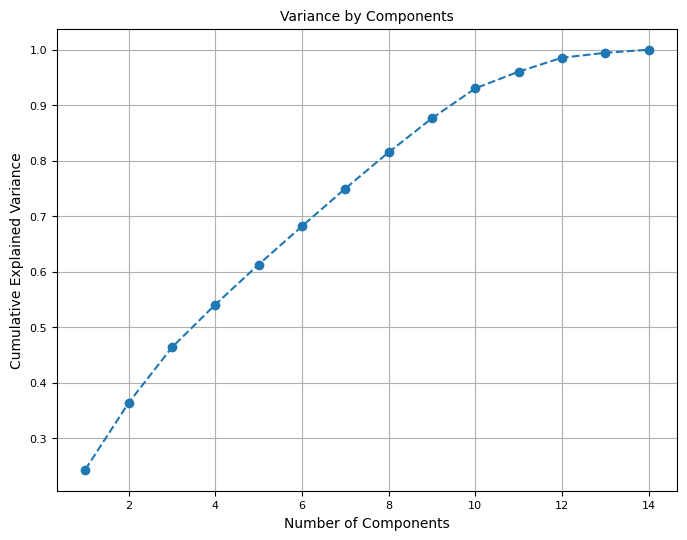

In [22]:
# Fitting the scaler to the data 'X' and transforming 'X' to standardize the features
X = X[num_cols]

scaler = StandardScaler()
X_standard = scaler.fit_transform(X)
 
pca = PCA()
 
# PCA model and transform it to get the principal components
pca_scores_4 = pd.DataFrame(pca.fit_transform(X_standard))
 
# the explained variance of each principal component
explained_var  = pca.explained_variance_
print(f" Explained variance :\n {explained_var}")
 
# the proportion of variance explained by each principal component
proportion_var = pca.explained_variance_ratio_
print(f" Proportion Variance :\n {proportion_var}")
 
# the cumulative proportion of variance
cummulative_proportion_var = np.cumsum(proportion_var)
print(f"Cumulative proportion :\n {cummulative_proportion_var}")
 
# Plotting Explained Variance by Components and number of components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
 
plt.title('Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

The above figure indicates that retaining all features is essential for maximizing variance in the dataset. It underscores the importance of preserving the entirety of the original feature set to capture the maximum amount of variability present in the data. By maintaining all features, we ensure that no potentially valuable information is lost during the dimensionality reduction process.